# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib as mpl
import pandas as pd

# 1. Logistic Regression (please view code [here](https://drive.google.com/file/d/1fBiWgg_BOtrE6DvQSWMivwLOGS7TPhns/view?usp=sharing) for best visualization on Colab)

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [2]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def linear_kernel(u, v):
    return u@v.T

def poly_kernel(u, v, kernel_param, free_param = 1):
    return (free_param + u@v.T)**kernel_param

def rbf_kernel(u, v, kernel_param, dim1, dim2):
    K = np.zeros([dim1,dim2])
    for i in range(dim1):
        for j in range(dim2):
            K[i,j] = np.exp(-kernel_param*np.linalg.norm(u[i]-v[j])**2)
    return K


def kernel_matrix(type, inputs):
    '''
    inputs: list of the form [X, X, kernel_param, dim1, dim2, free_param]
    '''
    if type == 'linear':
        return linear_kernel(inputs[0], inputs[1])
    elif type == 'poly':
        return poly_kernel(inputs[0], inputs[1], inputs[2], inputs[5])
    elif type == 'rbf':
        return rbf_kernel(inputs[0], inputs[1], inputs[2], inputs[3], inputs[4])

def sigmoid(u):
    return 1.0 / (1.0 + np.exp(-u))

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., kernel_param=1., num_iter_gd=100, eta = 0.001):
    
    n, d = X.shape[0], X.shape[1]
    inputs_to_kernel_func = [X, X, kernel_param, n, n, 1]
    K = kernel_matrix(kernel, inputs_to_kernel_func)
    alpha = np.zeros(n)
    # print(X.shape)
    # print(Y.shape)
    # print(K.shape)
    # print(alpha.shape)
    # for i in range(num_iter_gd):
    #     # grad(risk wrt alpha) = $ \sum_{i = 1} ^{n} (\sigma(-y_{i} * \alpha^{T} * K_{:,i})*(-Y[j]*K[:,j]) + \lambda * K * \alpha) $
    #     # grad = summation_term + product_term
    #     # grad = sigmoid_term*derivative_term + product_term
    #     summation_term = 0
    #     for j in range(n):
    #         sigmoid_term = -Y[j]*np.dot(alpha.T,K[:,j])
    #         derivative_term = -Y[j]*K[:,j]
    #         summation_term += sigmoid(sigmoid_term)*derivative_term
    #     # print(summation_term.shape)
    #     # print(derivative_term.shape)
    #     product_term = reg_param*np.dot(K,alpha)
    #     grad = summation_term.reshape(-1,1) + product_term
    #     grad_norm = np.linalg.norm(grad)
    #     if grad_norm > 1:
    #         grad = grad/grad_norm 
    #     #update rule
    #     alpha = alpha - eta*grad
         
    # # print(X.shape)
    # # print(Y.shape)
    # # print(K.shape)
    # # print(alpha.shape)
    # #problem with alpha   

    # return alpha
    ### changed code to have one for loop and use einstein sum for faster calculations
    ### Initially getting results took around 50 minutes for each dataset
    ### Hence, this change was made
    # Flow
    # grad(risk wrt alpha) = $ \sum_{i = 1} ^{n} (\sigma(-y_{i} * \alpha^{T} * K_{:,i})*(-Y[j]*K[:,j]) + \lambda * K * \alpha) $
    # grad = summation_term + product_term
    # grad = sigmoid_term*derivative_term + product_term
    derivative_term = -Y*K
    # print(derivative_term.shape)
    for i in range(num_iter_gd):
        sigmoid_term = -Y*np.einsum('i, ij -> j', alpha, K)
        # print(sigmoid_term.shape)
        # sigmoid_term = -Y*sigmoid_term
        # print(sigmoid_term.shape)
        sigmoid_term = sigmoid(sigmoid_term)
        # print(sigmoid_term.shape)
        product_term = reg_param*np.einsum('ij, j -> i', K, alpha)
        # print(product_term.shape)
        grad = np.einsum('j, ij -> i', sigmoid_term, derivative_term) + product_term
        # print(grad.shape)
        grad_norm = np.linalg.norm(grad)
        # this is done because we don't really care much about updating 
        # alpha according to the value of the. gradient
        # we just want it to be updated towards the right direction
        if grad_norm > 1:
            grad = grad/grad_norm
        alpha = alpha - eta*grad
    return alpha

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    # pred = $ sign(w^T \phi(x)) = sign(\sum_{i = 1}\alpha_{i} K(x_{i}, x)) $
    n, m = train_X.shape[0], test_X.shape[0]
    # print(alpha.shape)
    # print(train_X.shape)
    # print(test_X.shape)
    inputs_to_kernel_func = [train_X, test_X, kernel_param, n, m, 1]
    K = kernel_matrix(kernel, inputs_to_kernel_func)
    # print(K.shape)
    # pred_Y = np.sign(alpha.T@K)
    pred_Y = np.einsum('i, ij->j', alpha, K)
    pred_Y = np.sign(pred_Y)
    # print(pred_Y.shape)
    # pred_Y = pred_Y.reshape(-1,1)
    # print(pred_Y.shape)
    return pred_Y

In [3]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 
def choose_hyperparams(X_train, Y_train, X_test, Y_test, kernel, num_iter_gd=100, eta = 0.001):
    regs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
    kernel_params_poly = [1, 2, 3, 4, 5]
    kernel_params_rbf = [1e-3, 1e-2, 1e-1, 1, 2, 5, 10, 100]
    params = (0,1)
    err = 1
    dummy_linear_kernel_param = 1
    if kernel == 'linear':
        for reg in regs:
            alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg, dummy_linear_kernel_param, num_iter_gd, eta)
            Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel, dummy_linear_kernel_param)
            # print(Y_pred.shape)
            # print(Y_test.shape)
            test_err = np.sum(Y_pred != Y_test) / len(Y_test)
            if test_err < err:
                err = test_err
                params = (reg, 1)
        #     print(reg, test_err)
        # print(params, err)
        return params
    elif kernel == 'poly':
        for reg in regs:
            for param in kernel_params_poly:
                alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg, param, num_iter_gd, eta)
                Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel, param)
                test_err = np.sum(Y_pred != Y_test) / len(Y_test)
                if test_err < err:
                    err = test_err
                    params = (reg, param)
        #         print(reg, param, test_err)
        # print(params, err)
        return params
    elif kernel == 'rbf':
        for reg in regs:
            for param in kernel_params_rbf:
                alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg, param, num_iter_gd, eta)
                Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel, param)
                test_err = np.sum(Y_pred != Y_test) / len(Y_test)
                if test_err < err:
                    err = test_err
                    params = (reg, param)
        #         print(reg, param, test_err)
        # print(params, err)
        return params

def train_valid_split(X_train, Y_train, split = 0.8):
    indices = [i for i in range(len(X_train))]
    train_indices = np.random.choice(indices, size=round(len(indices) * split), replace = False)
    valid_indices = list(set(indices) - set(train_indices))
    X_tr = []
    Y_tr = []
    X_valid = []
    Y_valid = []
    for index in train_indices:
        X_tr.append(X_train[index])
        Y_tr.append(Y_train[index])
    for index in valid_indices:
        X_valid.append(X_train[index])
        Y_valid.append(Y_train[index])
    return np.array(X_tr), np.array(Y_tr), np.array(X_valid), np.array(Y_valid)

## flow
## 1. train and test loss for all combinations of hyperparams
## 2. train_valid_split
## 3. find best hyperparams
## 4. train and test loss for chosen hyperparams

def preprocess(file):
    data = np.load(file)
    X_train, Y_train, X_test, Y_test = np.array(data['arr_0']), np.array(data['arr_1']), np.array(data['arr_2']), np.array(data['arr_3'])
    #Y_train = np.vstack(Y_train)
    #Y_test = np.vstack(Y_test)
    mean, std = standardize(X_train)
    X_train = X_train-mean
    X_train = X_train/std
    X_test = X_test - mean
    X_test = X_test/std
    return X_train, Y_train, X_test, Y_test

def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return mean, (std + 1e-20)


def give_results(file, kernels, num_iter_gd=100, eta = 0.001):
    X_train, Y_train, X_test, Y_test = preprocess(file)
    X_tr, Y_tr, X_val, Y_val = train_valid_split(X_train, Y_train)
    results = []
    char1 = file[-5]
    for kernel in kernels:
        reg, kernel_param = choose_hyperparams(X_tr, Y_tr, X_val, Y_val, kernel, num_iter_gd = num_iter_gd, eta = eta)
        alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param = reg, kernel_param = kernel_param, num_iter_gd = num_iter_gd, eta = eta)
        Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param = kernel_param)
        Y_pred_test = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param = kernel_param)
        train_loss = np.sum(Y_pred_train != Y_train) / len(Y_train)
        test_loss = np.sum(Y_pred_test != Y_test) / len(Y_test)
        dict1 = {'Dataset':char1, 'Kernel': kernel,'Regularization Term': reg, 'Kernel Parameter': kernel_param, 'Train loss': train_loss, 'Test Loss': test_loss, 'Number of Iterations': num_iter_gd, 'Learning Rate': eta}
        results.append(dict1)
    df1 = pd.DataFrame(results)
    return df1

kernels = ['linear', 'poly', 'rbf']
file_name = '/content/Data/dataset_B.npz'
## uncomment the following two block to see the most recurring hyperparams over 10 iterations
# i = 10
# while i > 0:
#     result = give_result(file_name, criteria)
#     print(result)
#     i-=1
## uncomment the following block of code for getting one iteration of results    
# result = give_result(file_name, criteria)
# result

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

|index|Dataset|Kernel|Regularization Term|Kernel Parameter|Train loss|Test Loss|Number of Iterations|Learning Rate|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0|A|linear|0\.0001|-|0\.124|0\.134|300|0\.001|
|1|A|poly|0\.0001|3|0\.013333333333333334|0\.008|600|0\.001|
|2|A|rbf|0\.0001|100|0\.0|0\.002|300|0\.001|

|index|Dataset|Kernel|Regularization Term|Kernel Parameter|Train loss|Test Loss|Number of Iterations|Learning Rate|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0|B|linear|1\.0|-|0\.176|0\.202|300|0\.001|
|1|B|poly|0\.0001|1|0\.17466666666666666|0\.196|600|0\.001|
|2|B|rbf|0\.0001|0\.1|0\.17333333333333334|0\.196|300|0\.001|

|index|Dataset|Kernel|Regularization Term|Kernel Parameter|Train loss|Test Loss|Number of Iterations|Learning Rate|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0|C|linear|0\.0001|-|0\.074|0\.10437710437710437|300|0\.001|
|1|C|poly|0\.0001|3|0\.012666666666666666|0\.0707070707070707|300|0\.001|
|2|C|rbf|0\.0001|1|0\.0|0\.037037037037037035|300|0\.001|

|index|Dataset|Kernel|Regularization Term|Kernel Parameter|Train loss|Test Loss|Number of Iterations|Learning Rate|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0|D|linear|0\.0001|-|0\.01749999999999996|0\.035502958579881616|300|0\.001|
|1|D|poly|0\.0001|2|0\.020000000000000018|0\.041420118343195256|300|0\.001|
|2|D|rbf|0\.0001|1|0\.0|0\.035502958579881616|300|0\.001|


**Please note that these values might change as the training data was split into train and validation sets (80-20 split) without seeding. The chosen hyperparameters may hence be biased to the data achieved based on the split. This creates a need for employing k-fold cross validation. The hyperparameters occuring most number of times over 10 runs for each criterion were chosen manually here. Additionally, an alternative way for splitting data might be used: for example, data corresponding to the first 80% of the indices can be put into the training set and rest to the validation set. This way the results might be consistent everytime the code block is run, however the hyperparameters chosen will be very biased to the first 80% of the datapoints**

###Implementation Comments
- **Data standardisation** was carried out to help prevent overflow issues which arise with large data values.
- **np.einsum** was used for gradient descent alongwith **vectorisation** instead of np.matmul or the '@' operator elementiwise. This led to a **decrease in runtime** by more than 50%.
- **Normalized gradient descent** was implemented. The gradient descent algorithm works by identifying a direction along which the optimal solution can be found. The gradient turns out to be the best direction. However, we are typically not interested in the gradient's magnitude because we are only interested in the direction and not necessarily how far we move along that direction. As a result, normalised gradient serves our needs well, and we leave it up to the learning rate, eta to determine how far we want to move in the computed direction. It might also help prevent overshooting/ slow convergence if the magnitude of gradient is too high/low.
- The regularization parameter is the only hyper parameter in the linear kernel.
- The regularization parameter and the kernel parameter are the two hyperparameters of the polynomial kernel. The degree of the polynomial was tested between 1 and 5, as higher values result in overflows.
- The RBF kernel has two hyperparameters, the regularization parameter and the kernel parameter. 
- A function similar to the idea of  grid search was implemented to find the best hyperparameters.

## Dataset-specific Observations
### Dataset A
- To separate the classes in Dataset A, a non-linear decision boundary is required. As a result, the linear kernel performs significantly worse than the other two kernel options.
- Because the RBF kernel can learn highly non-linear decision boundaries, the train and test errors are relatively small.
- Several runs of the polynomial kernel revealed that even polynomials performed significantly worse than odd polynomials. This could be because the decision boundary looks might be close to an odd function.

### Dataset B
- A linear boundary is the best way to separate the classes in this dataset. As a result, the performance of all three kernels is comparable.
- The best performing polynomial kernel was one of degree 1, with other degrees performing significantly worse at times.
- All three classifiers provide a nearly linear decision boundary. However, due to the significant overlap between the class conditionals, the Bayes error will be high. This is evident in the high errors produced by all three classifiers.
- In general, optimisation was more difficult because datapoints from different classes were mixed together and there was no "perfect" solution. No direction of the optimization environment will be too steep. As a result, higher values of gradient descent iterations were required.

### Dataset C
- With 64 features per datapoint, this is a high-dimensional dataset, making it more difficult to make generalisations about its true nature.
- Better results were obtained with non-linear decision boundaries, proving that the data in the 64-dimensional space is not linearly separable by a hyperplane.

### Dataset D
- Similar performance of linear and RBF kernels might hint towards a linear decision boundary (hyperplane).

## General Observations
- The time taken for the program to run and decide the ideal hyperparameters is much higher for higher-dimensional datasets C and D. Since we are using simple logistic regression with naive implementation of GD, the results obtained for these two datasets might not be very accurate.
- Ideally, we would need to run the algorithm for higher number of iterations for better and more accurate results (as we will notice from SVM results, where we are using a optimized solution through a library). However, this is very expensive in terms of computation and time. hence, we are limited by these restrictions to limit our itertaions to the order of 100.



<Figure size 432x288 with 0 Axes>

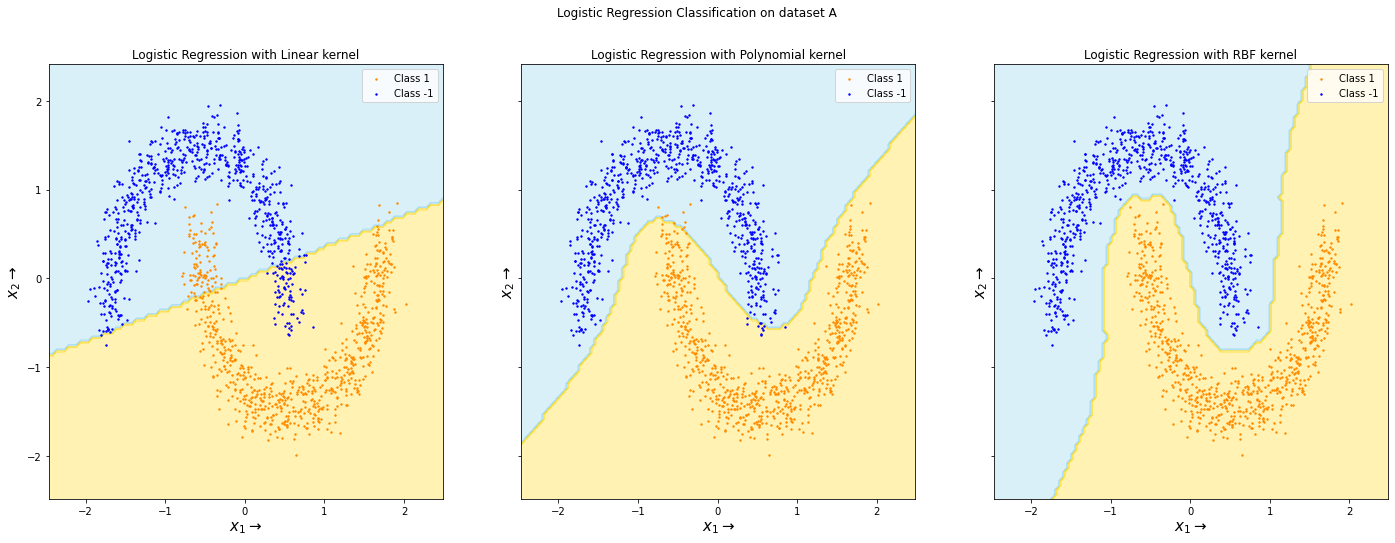

<Figure size 432x288 with 0 Axes>

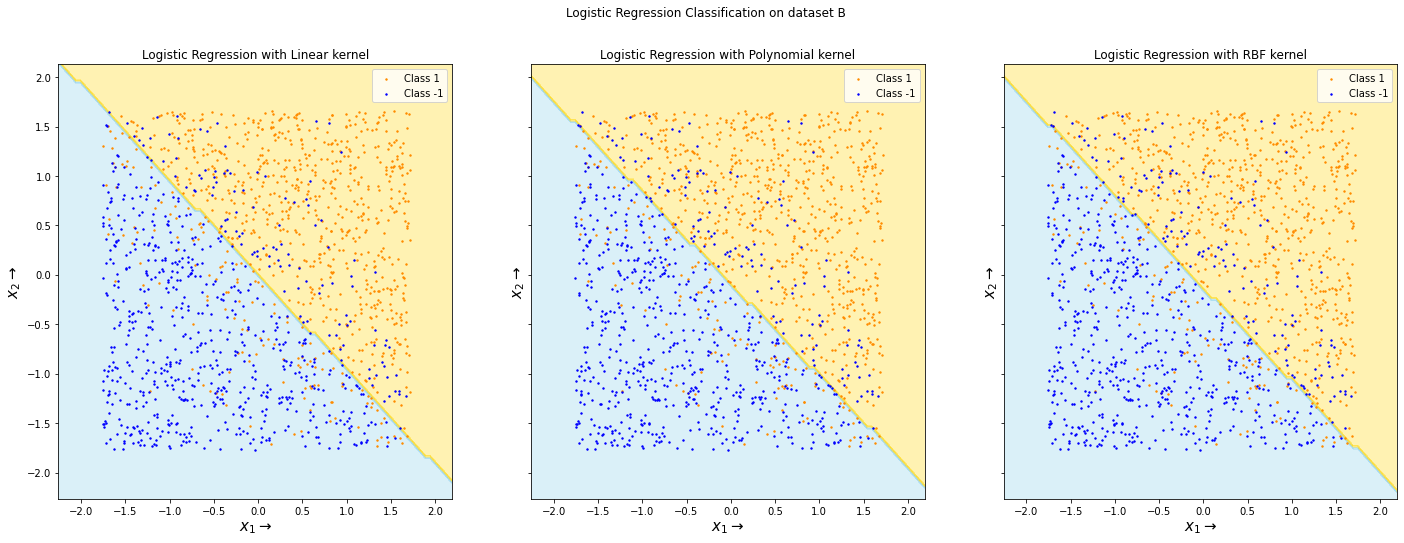

In [4]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

####Uncomment the following lines in this block to get plots

X_train, Y_train, X_test, Y_test = preprocess('/content/Data/dataset_A.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)

alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=0.0001, kernel_param=1, num_iter_gd=300)
pred_y_l = test_pred(alpha, X_train, Y_train, testing_set, kernel='linear',kernel_param=1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=0.0001, kernel_param=3, num_iter_gd=600)
pred_y_p = test_pred(alpha, X_train, Y_train, testing_set, kernel='poly',kernel_param=3)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=0.0001, kernel_param=100, num_iter_gd=300)
pred_y_r = test_pred(alpha, X_train, Y_train, testing_set, kernel='rbf',kernel_param=100)

plt.figure(0)
f, ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(24,8))
f.suptitle('Logistic Regression Classification on dataset A')
ax[0].contourf(X,Y,pred_y_l.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax[1].contourf(X,Y,pred_y_p.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax[2].contourf(X,Y,pred_y_r.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
crit = ['Linear', 'Polynomial', 'RBF']
for i, a in enumerate(ax):
    a.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='darkorange', label='Class 1')
    a.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='blue',label='Class -1')
    a.set_title(f'Logistic Regression with {crit[i]} kernel')
    a.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    a.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    a.legend()
plt.show()



X_train, Y_train, X_test, Y_test = preprocess('/content/Data/dataset_B.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)

alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=1, kernel_param=1, num_iter_gd=300)
pred_y_l = test_pred(alpha, X_train, Y_train, testing_set, kernel='linear',kernel_param=1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=0.0001, kernel_param=1, num_iter_gd=600)
pred_y_p = test_pred(alpha, X_train, Y_train, testing_set, kernel='poly',kernel_param=1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=0.0001, kernel_param=0.1, num_iter_gd=300)
pred_y_r = test_pred(alpha, X_train, Y_train, testing_set, kernel='rbf',kernel_param=0.1)

plt.figure(0)
f, ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(24,8))
f.suptitle('Logistic Regression Classification on dataset B')
ax[0].contourf(X,Y,pred_y_l.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax[1].contourf(X,Y,pred_y_p.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax[2].contourf(X,Y,pred_y_r.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
crit = ['Linear', 'Polynomial', 'RBF']
for i, a in enumerate(ax):
    a.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='darkorange', label='Class 1')
    a.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='blue',label='Class -1')
    a.set_title(f'Logistic Regression with {crit[i]} kernel')
    a.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    a.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    a.legend()
plt.show()

# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [5]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here
def svm_train(X, Y, kernel = 'linear', kernel_param = 1, reg_param = 1):
    if kernel == 'linear':
        clf = svm.SVC(C = reg_param, kernel = kernel)
    elif kernel == 'poly':
        clf = svm.SVC(C = reg_param, kernel = kernel, degree = kernel_param, coef0 = 1)
    elif kernel == 'rbf':
        clf = svm.SVC(C = reg_param, kernel = kernel, gamma = kernel_param)
    clf.fit(X, Y)
    return clf

def svm_test(clf, X_test):
    return clf.predict(X_test)

In [6]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.
def choose_hyperparams(X_train, Y_train, X_test, Y_test, kernel):
    regs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
    kernel_params_poly = [1, 2, 3, 4, 5]
    kernel_params_rbf = [1e-3, 1e-2, 1e-1, 1, 2, 5, 10, 100]
    params = (0,1)
    err = 1
    dummy_linear_kernel_param = 1
    if kernel == 'linear':
        for reg in regs:
            clf = svm_train(X_train, Y_train, kernel, dummy_linear_kernel_param, reg)
            Y_pred = svm_test(clf, X_test)
            # print(Y_pred.shape)
            # print(Y_test.shape)
            test_err = np.sum(Y_pred != Y_test) / len(Y_test)
            if test_err < err:
                err = test_err
                params = (reg, 1)
        return params
    elif kernel == 'poly':
        for reg in regs:
            for param in kernel_params_poly:
                clf = svm_train(X_train, Y_train, kernel, param, reg)
                Y_pred = svm_test(clf, X_test)
                test_err = np.sum(Y_pred != Y_test) / len(Y_test)
                if test_err < err:
                    err = test_err
                    params = (reg, param)
        return params
    elif kernel == 'rbf':
        for reg in regs:
            for param in kernel_params_rbf:
                clf = svm_train(X_train, Y_train, kernel, param, reg)
                Y_pred = svm_test(clf, X_test)
                test_err = np.sum(Y_pred != Y_test) / len(Y_test)
                if test_err < err:
                    err = test_err
                    params = (reg, param)
        return params

def train_valid_split(X_train, Y_train, split = 0.8):
    indices = [i for i in range(len(X_train))]
    train_indices = np.random.choice(indices, size=round(len(indices) * split), replace = False)
    valid_indices = list(set(indices) - set(train_indices))
    X_tr = []
    Y_tr = []
    X_valid = []
    Y_valid = []
    for index in train_indices:
        X_tr.append(X_train[index])
        Y_tr.append(Y_train[index])
    for index in valid_indices:
        X_valid.append(X_train[index])
        Y_valid.append(Y_train[index])
    return np.array(X_tr), np.array(Y_tr), np.array(X_valid), np.array(Y_valid)

def preprocess(file):
    data = np.load(file)
    X_train, Y_train, X_test, Y_test = np.array(data['arr_0']), np.array(data['arr_1']), np.array(data['arr_2']), np.array(data['arr_3'])
    mean, std = standardize(X_train)
    X_train = X_train-mean
    X_train = X_train/std
    X_test = X_test - mean
    X_test = X_test/std
    return X_train, Y_train, X_test, Y_test

def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return mean, (std + 1e-20)


def give_results(file, kernels):
    X_train, Y_train, X_test, Y_test = preprocess(file)
    X_tr, Y_tr, X_val, Y_val = train_valid_split(X_train, Y_train)
    results = []
    char1 = file[-5]
    for kernel in kernels:
        reg, kernel_param = choose_hyperparams(X_tr, Y_tr, X_val, Y_val, kernel)
        clf = svm_train(X_train, Y_train, kernel, kernel_param, reg)
        Y_pred_train = svm_test(clf, X_train)
        Y_pred_test = svm_test(clf, X_test)
        train_loss = np.sum(Y_pred_train != Y_train) / len(Y_train)
        test_loss = np.sum(Y_pred_test != Y_test) / len(Y_test)
        dict1 = {'Dataset':char1, 'Kernel': kernel,'Regularization Term': reg, 'Kernel Parameter': kernel_param, 'Train loss': train_loss, 'Test Loss': test_loss}
        results.append(dict1)
    df1 = pd.DataFrame(results)
    return df1


kernels = ['linear', 'poly', 'rbf']
file_name = '/content/Data/dataset_C.npz' 
## uncomment the following two block to see the most recurring hyperparams over 10 iterations
# i = 10
# while i > 0:
#     result = give_result(file_name, criteria)
#     print(result)
#     i-=1
## uncomment the following block of code for getting one iteration of results    
# result = give_result(file_name, criteria)
# result

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

|index|Dataset|Kernel|Regularization Term|Kernel Parameter|Train loss|Test Loss|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0|A|linear|1|-|0\.12866666666666668|0\.132|
|1|A|poly|100|3|0\.0|0\.002|4|
|2|A|rbf|0\.1|1|0\.002|0\.004|

|index|Dataset|Kernel|Regularization Term|Kernel Parameter|Train loss|Test Loss|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0|B|linear|0\.001|-|0\.174|0\.188|
|1|B|poly|0\.01|1|0\.16933333333333334|0\.196|
|2|B|rbf|0\.1|0\.01|0\.17266666666666666|0\.178|

|index|Dataset|Kernel|Regularization Term|Kernel Parameter|Train loss|Test Loss|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0|C|linear|10|-|0\.06133333333333333|0\.10437710437710437|
|1|C|poly|100\.0|4\.0|0\.0|0\.05387205387205387|
|2|C|rbf|10\.0|0\.01|0\.0|0\.020202020202020204|

|index|Dataset|Kernel|Regularization Term|Kernel Parameter|Train loss|Test Loss|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0|D|linear|0\.01|-|0\.015|0\.01775147928994083|
|1|D|poly|1\.0|1\.0|0\.02|0\.023668639053254437|
|2|D|rbf|10\.0|0\.01|0\.015|0\.011834319526627219|


**Please note that these values might change as the training data was split into train and validation sets (80-20 split) without seeding. The chosen hyperparameters may hence be biased to the data achieved based on the split. This creates a need for employing k-fold cross validation. The hyperparameters occuring most number of times over 10 runs for each criterion were chosen manually here. Additionally, an alternative way for splitting data might be used: for example, data corresponding to the first 80% of the indices can be put into the training set and rest to the validation set. This way the results might be consistent everytime the code block is run, however the hyperparameters chosen will be very biased to the first 80% of the datapoints**

### Implementation Comments
- The standardisation of the data resulted in a significant reduction in running time, possibly because computations were made simpler and more stable with the smaller size of data.

## Dataset-specific Observations
### Dataset A
- In this instance, a non-linear boundary can be used to divide the data. As a result, the performance of linear vs. polynoial and RBF kernels can be clearly distinguished.
- As it is with hard-margin SVMs, the regularization parameter is seen to be on the higher end for all kernels. This is as a result of the data's complete separability.

### Dataset B
- No matter how much the model can handle, the data in this case cannot be separated. Additionally, it can be seen from the plots that the data would be best separated by a roughly linear decision boundary. The comparable performance of each kernel option supports this conclusion.
- Since the regularisation values for this dataset are relatively lower across all kernels, soft-margin SVMs perform better in this scenario.

### Dataset C
- It can be concluded that a non-linear decision boundary can completely separate the data based on the low loss values of the polynomial and RBF kernels.
- High regularisation parameters for poly and RBF kernels suggest that hard margin SVMs perform better, which is promptly the case for separable data.

### Dataset D
- The data can probably not be completely separated based on the three kernels' performance as all of them have non-zero training losses which means none of the kernels can approximate the decision boundary perfectly.
- All three kernels perform similarly, with a linear polynomial being the best choice. Thus, a hyperplane in the 30-dim space appears to be the best decision boundary.

## Logistic regression V/S Support Vector Machines
- As the library employs sophisticated optimization algorithms and decomposition techniques as opposed to the straightforward gradient descent that we have used, we observe that SVMs generally outperform logistic regression on all datasets.
- It can be noted that making comments about the kind of data in terms of the seprabaility of the two classes or the linearity of the decision boundary is difficult for high-dimensional daatsets (C and D) with the simple gradient descent algorithm implemented for Logistic regression above. With the help of library-empowered SVMs, we were able to comment on the nature of datasets C and D quite easily in terms of their separability and the ideal decision boundary.

<Figure size 432x288 with 0 Axes>

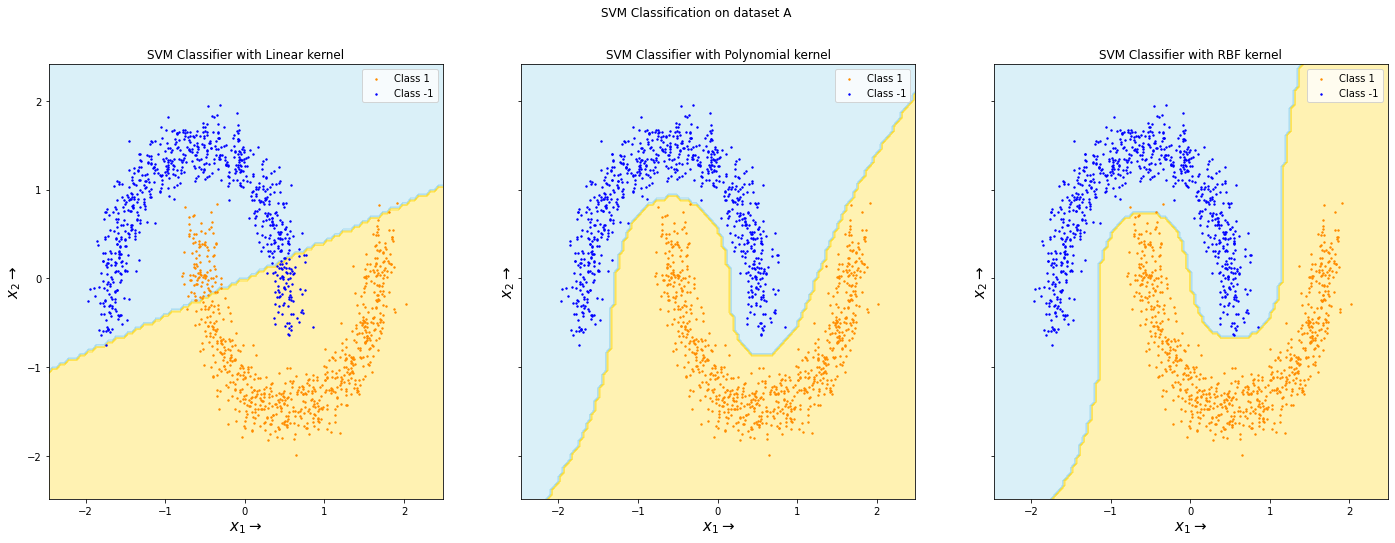

<Figure size 432x288 with 0 Axes>

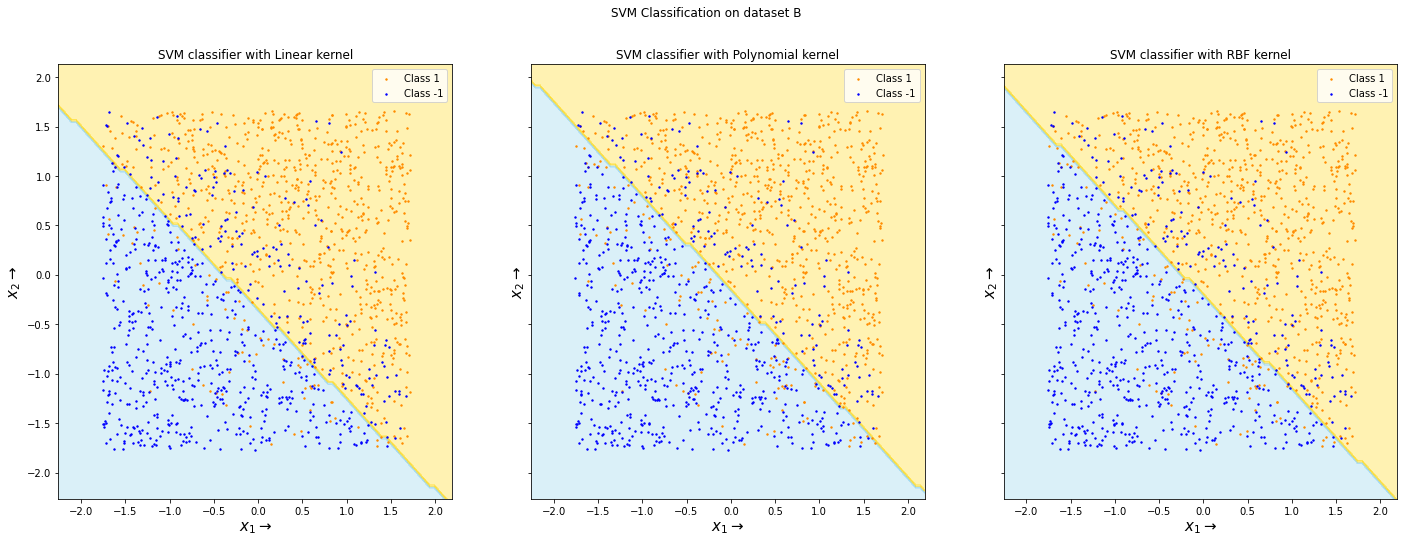

In [7]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

####Uncomment the following lines in this block to get plots

X_train, Y_train, X_test, Y_test = preprocess('/content/Data/dataset_A.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)

clf = svm_train(X_train, Y_train, kernel='linear', kernel_param=1, reg_param = 1)
pred_y_l = svm_test(clf, testing_set)
clf = svm_train(X_train, Y_train, kernel='poly', kernel_param=3, reg_param = 100)
pred_y_p = svm_test(clf, testing_set)
clf = svm_train(X_train, Y_train, kernel='rbf', kernel_param=1, reg_param = 0.1)
pred_y_r = svm_test(clf, testing_set)

plt.figure(0)
f, ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(24,8))
f.suptitle('SVM Classification on dataset A')
ax[0].contourf(X,Y,pred_y_l.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax[1].contourf(X,Y,pred_y_p.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax[2].contourf(X,Y,pred_y_r.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
crit = ['Linear', 'Polynomial', 'RBF']
for i, a in enumerate(ax):
    a.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='darkorange', label='Class 1')
    a.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='blue',label='Class -1')
    a.set_title(f'SVM Classifier with {crit[i]} kernel')
    a.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    a.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    a.legend()
plt.show()

X_train, Y_train, X_test, Y_test = preprocess('/content/Data/dataset_B.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)

clf = svm_train(X_train, Y_train, kernel='linear', kernel_param=1, reg_param = 0.001)
pred_y_l = svm_test(clf, testing_set)
clf = svm_train(X_train, Y_train, kernel='poly', kernel_param=1, reg_param = 0.01)
pred_y_p = svm_test(clf, testing_set)
clf = svm_train(X_train, Y_train, kernel='rbf', kernel_param=0.01, reg_param = 0.1)
pred_y_r = svm_test(clf, testing_set)

plt.figure(0)
f, ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(24,8))
f.suptitle('SVM Classification on dataset B')
ax[0].contourf(X,Y,pred_y_l.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax[1].contourf(X,Y,pred_y_p.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax[2].contourf(X,Y,pred_y_r.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
crit = ['Linear', 'Polynomial', 'RBF']
for i, a in enumerate(ax):
    a.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='darkorange', label='Class 1')
    a.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='blue',label='Class -1')
    a.set_title(f'SVM classifier with {crit[i]} kernel')
    a.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    a.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    a.legend()
plt.show()

# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [8]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)
def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    """ Returns a decision tree trained on X and Y. 
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    tree ={}
    init_val = -1
    tree[0] = [init_val]*3
    split_node_dec(tree, 0, X, Y, 0, num_nodes_stop, criterion)
    return tree

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    n = test_X.shape[0]
    Y_pred = np.zeros(n)
    for i in range(n):
        Y_pred[i] = pred_class(tree, 0, test_X[i])
    return Y_pred
    
neg = 0
pos = 0

def split_node_dec(tree, node_pos, X, Y, depth, num_nodes_stop=1, criterion = 'accuracy', stop_depth = 1e7):
    global neg, pos
    n,d = X.shape
    total_neg = np.sum((Y==-1))
    total_pos = np.sum((Y==1))
    one_class = False
    if total_pos == 0 or total_pos == n:
        one_class = True
    if n <= num_nodes_stop or depth >= stop_depth or ((pos == total_pos) and (neg == total_neg)) or one_class:
        if total_pos > total_neg:
            class_pred = 1
        else:
            class_pred = -1
        tree[node_pos] = [-1,-1, class_pred]
        return

    neg = total_neg
    pos = total_pos
    best_feat = 0
    best_thresh = 0
    best_acc = -np.inf
    
    for feat in range(d):
        ids = X[:,feat].argsort()
        X = X[ids]
        Y = Y[ids]
        min_feat = X[0][feat]
        max_feat = X[-1][feat]
        ### check here
        num_pts  = 11
        iter = max_feat - min_feat
        iter = iter/num_pts
        for pt in range(1, num_pts):
            thresh = min_feat + pt*iter
            pos_l = 0
            left = 0
            for sample in range(n):
                if X[sample][feat] <= thresh:
                    left+=1
                    if Y[sample]>0:
                        pos_l+=1
            pos_r = total_pos - pos_l
            right = n - left
            dec = split_dec(criterion, pos_l, left, pos_r, right)
            if dec >= best_acc:
                best_acc = dec
                best_feat = feat
                best_thresh = thresh
    X_left = X[X[:, best_feat] <= best_thresh]
    Y_left = Y[X[:, best_feat] <= best_thresh]
    X_right = X[X[:, best_feat] > best_thresh]
    Y_right = Y[X[:, best_feat] > best_thresh]
    tree[node_pos] = [best_feat, best_thresh, 0]
    split_node_dec(tree, 2*node_pos+1, X_left, Y_left, depth+1, num_nodes_stop, criterion, stop_depth)
    split_node_dec(tree, 2*node_pos+2, X_right, Y_right, depth+1, num_nodes_stop, criterion, stop_depth)
    return

def split_dec(criterion, pos_l, left, pos_r, right):
    if criterion == 'accuracy':
        val = (pos_l + right - pos_r)/(left+right)
        return max(val, 1-val)
    elif criterion == 'entropy':
        p_l = left/(left+right)
        h_l = h_func(pos_l/(left+1e-40))
        p_r = 1 - p_l
        h_r = h_func(pos_r/(right+1e-40))
        return (p_l*h_l + p_r*h_r)

def h_func(x):
    if x == 0 or x == 1:
        return 0
    return x*np.log2(x) + (1-x)*np.log2(1-x)

def pred_class(tree, node_pos, sample):
    if tree[node_pos][0] == -1:
        return tree[node_pos][2]
    loc = tree[node_pos][0]
    thresh = tree[node_pos][1]
    if sample[loc] <= thresh:
        return pred_class(tree, 2*node_pos+1, sample)
    else:
        return pred_class(tree, 2*node_pos+2, sample)

In [9]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.
def train_valid_split(X_train, Y_train, split = 0.8):
    indices = [i for i in range(len(X_train))]
    train_indices = np.random.choice(indices, size=round(len(indices) * split), replace = False)
    valid_indices = list(set(indices) - set(train_indices))
    X_tr = []
    Y_tr = []
    X_valid = []
    Y_valid = []
    for index in train_indices:
        X_tr.append(X_train[index])
        Y_tr.append(Y_train[index])
    for index in valid_indices:
        X_valid.append(X_train[index])
        Y_valid.append(Y_train[index])
    return np.array(X_tr), np.array(Y_tr), np.array(X_valid), np.array(Y_valid)

def preprocess(file):
    data = np.load(file)
    X_train, Y_train, X_test, Y_test = np.array(data['arr_0']), np.array(data['arr_1']), np.array(data['arr_2']), np.array(data['arr_3'])
    #Y_train = np.vstack(Y_train)
    #Y_test = np.vstack(Y_test)
    mean, std = standardize(X_train)
    X_train = X_train-mean
    X_train = X_train/std
    X_test = X_test - mean
    X_test = X_test/std
    return X_train, Y_train, X_test, Y_test

def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return mean, (std + 1e-20)

def choose_hyperparam(X_train, Y_train, X_test, Y_test, criterion):
    node_stop = [1, 2, 4, 8, 16, 32, 64, 128, 256]
    err = 1
    best_num_nodes_stop = 0
    for ns in node_stop:
        clf = train_decision_tree(X_train, Y_train, ns, criterion)
        Y_pred = eval_decision_tree(clf, X_test)
        test_err = np.sum(Y_pred != Y_test) / len(Y_pred)
        if test_err < err:
            err = test_err
            best_num_nodes_stop = ns
    return best_num_nodes_stop

def give_result(file, criteria):
    X_train, Y_train, X_test, Y_test = preprocess(file)
    # print(X_train.shape)
    # print(Y_train.shape)
    # print(X_test.shape)
    # print(Y_test.shape)
    X_tr, Y_tr, X_val, Y_val = train_valid_split(X_train, Y_train)
    results = []
    char1 = file[-5]
    for criterion in criteria:
        num_nodes_stop = choose_hyperparam(X_tr, Y_tr, X_val, Y_val, criterion)
        clf =  train_decision_tree(X_train, Y_train, num_nodes_stop, criterion)
        Y_pred_train = eval_decision_tree(clf, X_train)
        #print(Y_pred_train.shape)
        Y_pred_test = eval_decision_tree(clf, X_test)
        #print(Y_pred_test.shape)
        train_err = np.sum(Y_pred_train != Y_train) / len(Y_train)
        test_err = np.sum(Y_pred_test != Y_test) / len(Y_test)
        dict1 = {'Dataset':char1, 'Criterion': criterion,'num_nodes_stop': num_nodes_stop , 'Train loss': train_err, 'Test Loss': test_err}
        results.append(dict1)
    df1 = pd.DataFrame(results)
    return df1

criteria = ['accuracy', 'entropy']
file_name = '/content/Data/dataset_B.npz'
## uncomment the following two block to see the most recurring hyperparams over 10 iterations
# i = 10
# while i > 0:
#     result = give_result(file_name, criteria)
#     print(result)
#     i-=1
## uncomment the following block of code for getting one iteration of results    
# result = give_result(file_name, criteria)
# result

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

|index|Dataset|Criterion|num\_nodes\_stop|Train loss|Test Loss|
|:---:|:---:|:---:|:---:|:---:|:---:|
|0|A|accuracy|4|0\.011333333333333334|0\.028|
|1|A|entropy|8|0\.0006666666666666666|0\.008|

|index|Dataset|Criterion|num\_nodes\_stop|Train loss|Test Loss|
|:---:|:---:|:---:|:---:|:---:|:---:|
|0|B|accuracy|32|0\.16133333333333333|0\.216|
|1|B|entropy|64|0\.16133333333333333|0\.214|

|index|Dataset|Criterion|num\_nodes\_stop|Train loss|Test Loss|
|:---:|:---:|:---:|:---:|:---:|:---:|
|0|C|accuracy|64|0\.10733333333333334|0\.13804713804713806|
|1|C|entropy|1|0\.0|0\.08417508417508418|

|index|Dataset|Criterion|num\_nodes\_stop|Train loss|Test Loss|
|:---:|:---:|:---:|:---:|:---:|:---:|
|0|D|accuracy|16|0\.0425|0\.07692307692307693|
|1|D|entropy|1|0\.0|0\.08875739644970414|


**Please note that these values might change as the training data was split into train and validation sets (80-20 split) without seeding. The chosen hyperparameters may hence be biased to the data achieved based on the split. This creates a need for employing k-fold cross validation. The hyperparameters occuring most number of times over 10 runs for each criterion were chosen manually here. Additionally, an alternative way for splitting data might be used: for example, data corresponding to the first 80% of the indices can be put into the training set and rest to the validation set. This way the results might be consistent everytime the code block is run, however the hyperparameters chosen will be very biased to the first 80% of the datapoints**

## Observations
- No matter the dataset, when num_nodes_stop is set to 1, the training error is at its lowest. Additionally, this setting has zero training error. Decision trees have the ability to always be made to perfectly fit the training data, which is one of their characteristics. However, as can be seen, because we are overfitting the training data, this setting frequently does not result in the best performance in the validation set.
- As can be seen, training error is almost always much lower than test error. This demonstrates decision trees' propensity for overfitting and their instability as classifiers once more.
- The entropy criterion (convex) consistently performs better than the accuracy(non-convex) criterion, as seen. The discontinuous derivative of the accuracy criterion can cause issues when trying to find the best choice within the search space. Due to its differentiability, the entropy parameter may yield more accurate results when determining the optimal point.
- Since we were able to achieve more than 97% accuracy without even fitting the entire training set, dataset A appears to be straightforward to fit.
- A diagonal separator appears to be the most effective way to separate dataset B from the other classifiers. Decision trees, however, can only create horizontal or vertical boundaries. To model a smooth diagonal line like that, an infinite number of decision thresholds are required. As a result, decision trees perform the worst of all the classifiers because they cannot accurately model the boundary.
- The largest error difference between accuracy and entropy criteria is found in Dataset C. Entropy works to favour the split that produces more pure nodes in situations where there are equal accuracy splits.
- Since Dataset D, is also suspected to have a hyperplane as a decision boundary, we can compare its results with that of dataset B closely.

<Figure size 432x288 with 0 Axes>

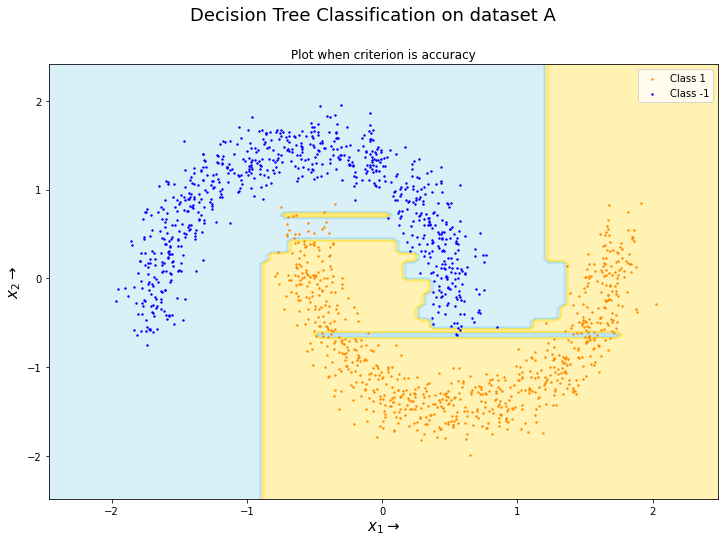

<Figure size 432x288 with 0 Axes>

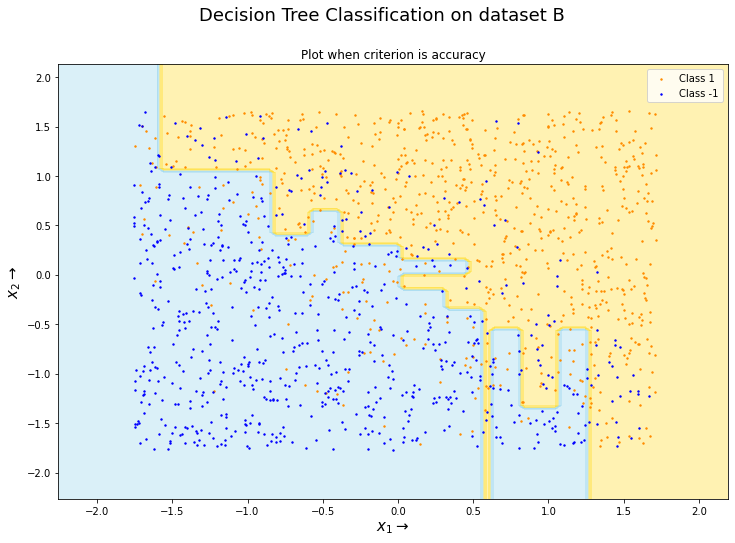

In [10]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

####Uncomment the following lines in this block to get plots

X_train, Y_train, X_test, Y_test = preprocess('/content/Data/dataset_A.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
clf = train_decision_tree(X_train, Y_train, num_nodes_stop=4, criterion='accuracy')
predA = eval_decision_tree(clf, testing_set)

plt.figure(0)
f, ax = plt.subplots(1,1,sharex=False,sharey=True,figsize=(12,8))
f.suptitle('Decision Tree Classification on dataset A', size=18)
ax.contourf(X,Y,predA.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='darkorange', label='Class 1')
ax.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='blue',label='Class -1')
ax.set_title(f'Plot when criterion is accuracy')
ax.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax.legend()
plt.show()


X_train, Y_train, X_test, Y_test = preprocess('/content/Data/dataset_B.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
clf = train_decision_tree(X_train, Y_train, num_nodes_stop=32, criterion='accuracy')
predB = eval_decision_tree(clf, testing_set)

plt.figure(0)
f, ax = plt.subplots(1,1,sharex=False,sharey=True,figsize=(12,8))
f.suptitle('Decision Tree Classification on dataset B', size=18)
ax.contourf(X,Y,predB.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='darkorange', label='Class 1')
ax.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='blue',label='Class -1')
ax.set_title(f'Plot when criterion is accuracy')
ax.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax.legend()
plt.show()

# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [11]:
# CodeWrite cell
# Write Random Forest classifier. 
def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, 
                        criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y. 
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """
    n,d = X.shape
    rf = []
    for i in range(num_trees):
        frac_data = np.sort(np.random.choice(range(n), int(n*a), replace = False))
        rf.append(train_dt_rf(X[frac_data], Y[frac_data], num_nodes_stop, criterion, b))
    return rf
    

def eval_random_forest(random_forest, test_X):
    """ Takes in a  random forest object (hhowever you want to store it), and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    m, dim = test_X.shape
    Y_pred = np.zeros(m)
    for tree in random_forest:
        Y_pred = Y_pred + eval_dt_rf(tree, test_X)
    return np.sign(Y_pred)

def train_dt_rf(X, Y, num_nodes_stop, criterion, b):
    tree = {}
    init_val = -1
    tree[0] = [init_val]*3
    split_node_dec_rf(tree, 0, X, Y, 0, b, num_nodes_stop, criterion)
    return tree

def eval_dt_rf(tree, test_X):
    n = test_X.shape[0]
    Y = np.zeros(n)
    for i in range(n):
        Y[i] = pred_class_rf(tree, 0, test_X[i])
    return Y


def pred_class_rf(tree, node_pos, sample):
    if tree[node_pos][0] == -1:
        return tree[node_pos][2]
    loc = tree[node_pos][0]
    thresh = tree[node_pos][1]
    if sample[loc] <= thresh:
        return pred_class(tree, 2*node_pos+1, sample)
    else:
        return pred_class(tree, 2*node_pos+2, sample)


neg = 0
pos = 0

def split_node_dec_rf(tree, node_pos, X, Y, depth, b, num_nodes_stop=1, criterion = 'accuracy', stop_depth = 1e7):
    global neg, pos
    n,d = X.shape
    total_neg = np.sum((Y==-1))
    total_pos = np.sum((Y==1))
    one_class = False
    if total_pos == 0 or total_pos == n:
        one_class = True
    if n <= num_nodes_stop or depth >= stop_depth or ((pos == total_pos) and (neg == total_neg)) or one_class:
        if total_pos > total_neg:
            class_pred = 1
        else:
            class_pred = -1
        tree[node_pos] = [-1,-1, class_pred]
        return

    neg = total_neg
    pos = total_pos
    best_feat = 0
    best_thresh = 0
    best_acc = -np.inf
    feats = np.sort(np.random.choice(range(d), int(d*b), replace = False))
    for feat in feats:
        ids = X[:,feat].argsort()
        X = X[ids]
        Y = Y[ids]
        min_feat = X[0][feat]
        max_feat = X[-1][feat]
        ### check here
        num_pts  = 11
        iter = max_feat - min_feat
        iter = iter/num_pts
        for pt in range(1, num_pts):
            thresh = min_feat + pt*iter
            pos_l = 0
            left = 0
            for sample in range(n):
                if X[sample][feat] <= thresh:
                    left+=1
                    if Y[sample]>0:
                        pos_l+=1
            pos_r = total_pos - pos_l
            right = n - left
            dec = split_dec_rf(criterion, pos_l, left, pos_r, right)
            if dec >= best_acc:
                best_acc = dec
                best_feat = feat
                best_thresh = thresh
    X_left = X[X[:, best_feat] <= best_thresh]
    Y_left = Y[X[:, best_feat] <= best_thresh]
    X_right = X[X[:, best_feat] > best_thresh]
    Y_right = Y[X[:, best_feat] > best_thresh]
    tree[node_pos] = [best_feat, best_thresh, 0]
    split_node_dec_rf(tree, 2*node_pos+1, X_left, Y_left, depth+1, b, num_nodes_stop, criterion, stop_depth)
    split_node_dec_rf(tree, 2*node_pos+2, X_right, Y_right, depth+1, b, num_nodes_stop, criterion, stop_depth)
    return

def split_dec_rf(criterion, pos_l, left, pos_r, right):
    if criterion == 'accuracy':
        val = (pos_l + right - pos_r)/(left+right)
        return max(val, 1-val)
    elif criterion == 'entropy':
        p_l = left/(left+right)
        h_l = h_func(pos_l/(left+1e-40))
        p_r = 1 - p_l
        h_r = h_func(pos_r/(right+1e-40))
        return (p_l*h_l + p_r*h_r)

def h_func(x):
    if x == 0 or x == 1:
        return 0
    return x*np.log2(x) + (1-x)*np.log2(1-x)

In [12]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.
def train_valid_split(X_train, Y_train, split = 0.8):
    indices = [i for i in range(len(X_train))]
    train_indices = np.random.choice(indices, size=round(len(indices) * split), replace = False)
    valid_indices = list(set(indices) - set(train_indices))
    X_tr = []
    Y_tr = []
    X_valid = []
    Y_valid = []
    for index in train_indices:
        X_tr.append(X_train[index])
        Y_tr.append(Y_train[index])
    for index in valid_indices:
        X_valid.append(X_train[index])
        Y_valid.append(Y_train[index])
    return np.array(X_tr), np.array(Y_tr), np.array(X_valid), np.array(Y_valid)

def preprocess(file):
    data = np.load(file)
    X_train, Y_train, X_test, Y_test = np.array(data['arr_0']), np.array(data['arr_1']), np.array(data['arr_2']), np.array(data['arr_3'])
    #Y_train = np.vstack(Y_train)
    #Y_test = np.vstack(Y_test)
    mean, std = standardize(X_train)
    X_train = X_train-mean
    X_train = X_train/std
    X_test = X_test - mean
    X_test = X_test/std
    return X_train, Y_train, X_test, Y_test

def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return mean, (std + 1e-20)

def choose_hyperparam(X_train, Y_train, X_test, Y_test, criterion):
    num_trees = [5, 10, 20, 30, 40, 50, 60, 70, 80]
    err = 1
    best_num_trees = 0
    for nt in num_trees:
        clf = train_random_forest(X_train, Y_train, nt, 1, criterion)
        Y_pred = eval_random_forest(clf, X_test)
        test_err = np.sum(Y_pred != Y_test) / len(Y_pred)
        if test_err < err:
            err = test_err
            best_num_trees = nt
    return best_num_trees

def give_result(file, criteria):
    X_train, Y_train, X_test, Y_test = preprocess(file)
    # print(X_train.shape)
    # print(Y_train.shape)
    # print(X_test.shape)
    # print(Y_test.shape)
    X_tr, Y_tr, X_val, Y_val = train_valid_split(X_train, Y_train)
    results = []
    char1 = file[-5]
    for criterion in criteria:
        num_trees = choose_hyperparam(X_tr, Y_tr, X_val, Y_val, criterion)
        clf =  train_random_forest(X_train, Y_train, num_trees, 1, criterion)
        Y_pred_train = eval_random_forest(clf, X_train)
        #print(Y_pred_train.shape)
        Y_pred_test = eval_random_forest(clf, X_test)
        #print(Y_pred_test.shape)
        train_err = np.sum(Y_pred_train != Y_train) / len(Y_train)
        test_err = np.sum(Y_pred_test != Y_test) / len(Y_test)
        dict1 = {'Dataset':char1, 'Criterion': criterion,'Number of trees': num_trees , 'Train loss': train_err, 'Test Loss': test_err}
        results.append(dict1)
    df1 = pd.DataFrame(results)
    return df1

criteria = ['accuracy', 'entropy']
file_name = '/content/Data/dataset_D.npz'
## uncomment the following two blocks to see the most recurring hyperparams over 10 iterations
# i = 10
# while i > 0:
#     result = give_result(file_name, criteria)
#     print(result)
#     i-=1
## uncomment the following block of code for getting one iteration of results    
# result = give_result(file_name, criteria)
# result

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

|index|Dataset|Criterion|Number of trees|Train loss|Test Loss|
|:---:|:---:|:---:|:---:|:---:|:---:|
|0|A|accuracy|30|0\.0|0\.018|
|1|A|entropy|10|0\.0006666666666666666|0\.008|

|index|Dataset|Criterion|Number of trees|Train loss|Test Loss|
|:---:|:---:|:---:|:---:|:---:|:---:|
|0|B|accuracy|50|0\.024666666666666667|0\.216|
|1|B|entropy|80|0\.013333333333333334|0\.212|

|index|Dataset|Criterion|Number of trees|Train loss|Test Loss|
|:---:|:---:|:---:|:---:|:---:|:---:|
|0|C|accuracy|50|0\.07066666666666667|0\.12457912457912458|
|1|C|entropy|70|0\.0|0\.06060606060606061|

|index|Dataset|Criterion|Number of trees|Train loss|Test Loss|
|:---:|:---:|:---:|:---:|:---:|:---:|
|0|D|accuracy|20|0\.005|0\.03550295857988166|
|1|D|entropy|40|0\.0025|0\.023668639053254437|6|

**Please note that these values might change as the training data was split into train and validation sets (80-20 split) without seeding. The chosen hyperparameters may hence be biased to the data achieved based on the split. This creates a need for employing k-fold cross validation. The hyperparameters occuring most number of times over 10 runs for each criterion were chosen manually here. Additionally, an alternative way for splitting data might be used: for example, data corresponding to the first 80% of the indices can be put into the training set and rest to the validation set. This way the results might be consistent everytime the code block is run, however the hyperparameters chosen will be very biased to the first 80% of the datapoints**

## Observations
- Low training errors are observed as we have set num_node_size = 1.
- As with decision trees, random forests trained on entropy perform better than the ones trained on accuracy.
- Random forests outperform decision trees across almost all datasets and criteria. 
- Under the entropy criterion, dataset A needs the least number of trees to produce good results This might be due to the fact that a few linear boundaries can be easily used to separate dataset A. Hence, a small number of trees can do the job of classifying points in dataset A effectively.
- The difference between the train and test errors in Dataset B is extremely large. The number of trees is also quite large. As a result, significant overfitting can be concluded.
- With the entropy criterion, there is a significant reduction in test error from decision trees to random forests in Datasets C and D, even though the train errors are comparable. This means that bagging and random selection have improved the classifier's generalizability.
- When we only use one tree, the training and validation errors are the highest. This is to be expected because the tree, having only been trained on half the data and half the set of available features, will neither fit the data well nor generalise to previously unseen data. 

<Figure size 432x288 with 0 Axes>

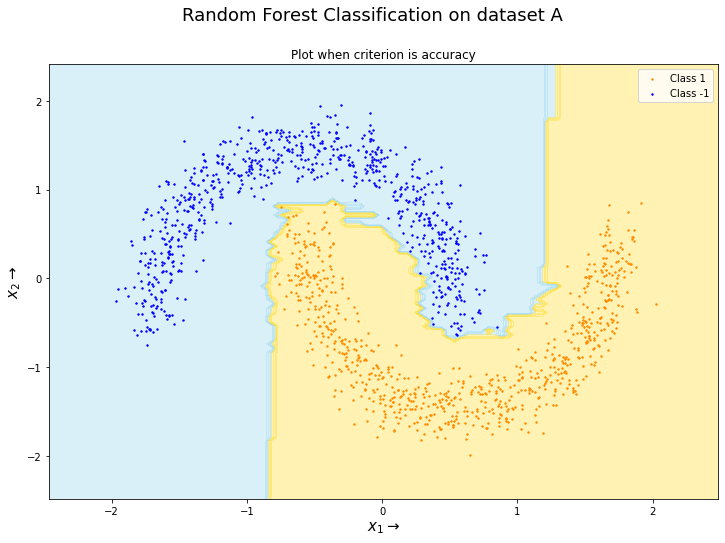

<Figure size 432x288 with 0 Axes>

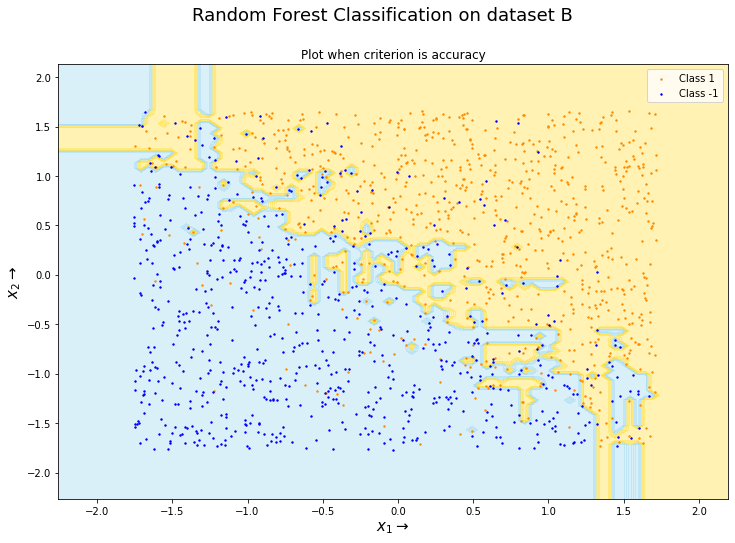

In [13]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

####Uncomment the following lines in this block to get plots

X_train, Y_train, X_test, Y_test = preprocess('/content/Data/dataset_A.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
clf = train_random_forest(X_train, Y_train, num_trees = 30, num_nodes_stop = 1, criterion='accuracy')
predA = eval_random_forest(clf, testing_set)

plt.figure(0)
f, ax = plt.subplots(1,1,sharex=False,sharey=True,figsize=(12,8))
f.suptitle('Random Forest Classification on dataset A', size=18)
ax.contourf(X,Y,predA.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='darkorange', label='Class 1')
ax.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='blue',label='Class -1')
ax.set_title(f'Plot when criterion is accuracy')
ax.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax.legend()
plt.show()


X_train, Y_train, X_test, Y_test = preprocess('/content/Data/dataset_B.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
clf = train_random_forest(X_train, Y_train, num_trees = 50, num_nodes_stop = 1, criterion='accuracy')
predB = eval_random_forest(clf, testing_set)

plt.figure(0)
f, ax = plt.subplots(1,1,sharex=False,sharey=True,figsize=(12,8))
f.suptitle('Random Forest Classification on dataset B', size=18)
ax.contourf(X,Y,predB.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='darkorange', label='Class 1')
ax.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='blue',label='Class -1')
ax.set_title(f'Plot when criterion is accuracy')
ax.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax.legend()
plt.show()

# 5 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [14]:
# Codewrite cell
# Write code to run here (no plotting)
neg = 0
pos = 0
def split_node_dec_ada(tree, node_pos, X, Y, W, depth, num_nodes_stop = 1, criterion = 'accuracy', stop_depth = 1e7):
    global neg, pos
    n = int(np.sum(W))
    n_total, d = X.shape
    total_pos = int(np.sum(W[(Y == 1)]))
    total_neg = int(np.sum(W[(Y == -1)]))
    one_class = False
    if total_pos == 0 or total_pos == n:
        one_class = True
    # print(n)
    # print(num_nodes_stop)
    # print(depth)
    # print(stop_depth)
    # print(pos)
    # print(total_pos)
    # print(neg)
    # print(total_neg)
    if n <= num_nodes_stop or depth >= stop_depth or ((pos == total_pos) and (neg == total_neg)) or one_class:
        if total_pos > total_neg:
            class_pred = 1
        else:
            class_pred = -1
        tree[node_pos] = [-1,-1, class_pred]
        return

    neg = total_neg
    pos = total_pos
    best_feat = 0
    best_thresh = 0
    best_acc = -np.inf
    for feat in range(d):
        ids = X[:, feat].argsort()
        X = X[ids]
        Y = Y[ids]
        W = W[ids]
        min_feat = X[0][feat]
        max_feat = X[-1][feat]
        num_pts  = 11
        iter = max_feat - min_feat
        iter = iter/num_pts
        for pt in range(1, num_pts):
            thresh = min_feat + pt*iter
            pos_l = 0
            left = 0
            for sample in range(n_total):
                if X[sample][feat] <= thresh:
                    left += (W[sample])
                    if Y[sample] > 0:
                        pos_l += (W[sample])
            pos_r = total_pos - pos_l
            right = n - left
            dec = split_dec_ada(criterion, pos_l, left, pos_r, right)
            if dec >= best_acc:
                best_acc = dec
                best_feat = feat
                best_thresh = thresh
    ind = (X[:, best_feat] <= best_thresh)
    X_left = X[ind]
    Y_left = Y[ind]
    W_left = W[ind]
    ind = (X[:, best_feat] > best_thresh)
    X_right = X[ind]
    Y_right = Y[ind]
    W_right = W[ind]
    tree[node_pos] = [best_feat, best_thresh, 0]
    split_node_dec_ada(tree, 2*node_pos+1, X_left, Y_left, W_left, depth+1, num_nodes_stop, criterion, stop_depth)
    split_node_dec_ada(tree, 2*node_pos+2, X_right, Y_right, W_right, depth+1, num_nodes_stop, criterion, stop_depth)
    return

def split_dec_ada(criterion, pos_l, left, pos_r, right):
    if criterion == 'accuracy':
        val = (pos_l + right - pos_r)/(left+right)
        return max(val, 1-val)
    elif criterion == 'entropy':
        p_l = left/(left+right)
        h_l = h_func(pos_l/(left+1e-40))
        p_r = 1 - p_l
        h_r = h_func(pos_r/(right+1e-40))
        return (p_l*h_l + p_r*h_r)

def h_func(x):
    if x == 0 or x == 1:
        return 0
    return x*np.log2(x) + (1-x)*np.log2(1-x)

def weak_learner(X_train, Y_train, X_test, W, depth):
  #print(3, depth)
  tree = train_dt_depth(X_train,Y_train, W, depth)
  pred = eval_decision_tree(tree, X_test)
  return pred,tree

def train_dt_depth(X, Y, W, depth, criterion='accuracy'):
    #print(4, depth)
    tree = {}
    init_val = -1
    tree[0] = [init_val]*3
    split_node_dec_ada(tree, 0, X, Y, W, 0, 1 , criterion, depth)
    return tree

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    n = test_X.shape[0]
    Y_pred = np.zeros(n)
    for i in range(n):
        Y_pred[i] = pred_class(tree, 0, test_X[i])
    return Y_pred

def adaboost(X, Y, depth):
  n = X.shape[0]
  W = np.ones(n)
  beta = np.zeros(50)
  learner = {}
  #print(2, depth)
  for i in range(50) :
    Y_pred, learner[i] = weak_learner(X, Y, X, W, depth)
    L = abs(Y-Y_pred)/2
    gamma = 1/2 - (W @ L.T)/(np.sum(W) + 1e-50)
    beta[i] = (0.5 + gamma)/(0.5 - gamma + 1e-50)
    W = [w*(beta[i]**int(L[j])) for j,w in enumerate(W)]
    W = np.array(W)
  return np.log(beta), learner

def pred_class(tree, node_pos, sample):
    if tree[node_pos][0] == -1:
        return tree[node_pos][2]
    loc = tree[node_pos][0]
    thresh = tree[node_pos][1]
    if sample[loc] <= thresh:
        return pred_class(tree, 2*node_pos+1, sample)
    else:
        return pred_class(tree, 2*node_pos+2, sample)

def run_ada_iter(beta, learner, X_test):
    '''
    To be used for plotting loss
    '''
    m = X_test.shape[0]
    n_iter_tot = len(learner)
    preds = []
    for n in range(n_iter_tot) :
        pred = np.zeros(m)
        for j in range(m) :
            prediction = np.array([pred_class(learner[i],0,X_test[j]) for i in range(n+1)])
            pred[j] = prediction@beta[:n+1].T
        pred = np.sign(pred)
        preds.append(pred)
    return preds

def run_ada(beta, learner, X_test):
    '''
    To be used for plotting the weak learners
    '''
    m = X_test.shape[0]
    n_iter_tot = len(learner)
    pred = np.zeros(m)
    for j in range(m) :
        prediction = np.array([pred_class(learner[i], 0, X_test[j]) for i in range(n_iter_tot)])
        pred[j] = prediction@beta[:n_iter_tot+1].T
    pred = np.sign(pred)
    return pred

def preprocess(file):
    data = np.load(file)
    X_train, Y_train, X_test, Y_test = np.array(data['arr_0']), np.array(data['arr_1']), np.array(data['arr_2']), np.array(data['arr_3'])
    #Y_train = np.vstack(Y_train)
    #Y_test = np.vstack(Y_test)
    mean, std = standardize(X_train)
    X_train = X_train-mean
    X_train = X_train/std
    X_test = X_test - mean
    X_test = X_test/std
    return X_train, Y_train, X_test, Y_test

def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return mean, (std + 1e-20)

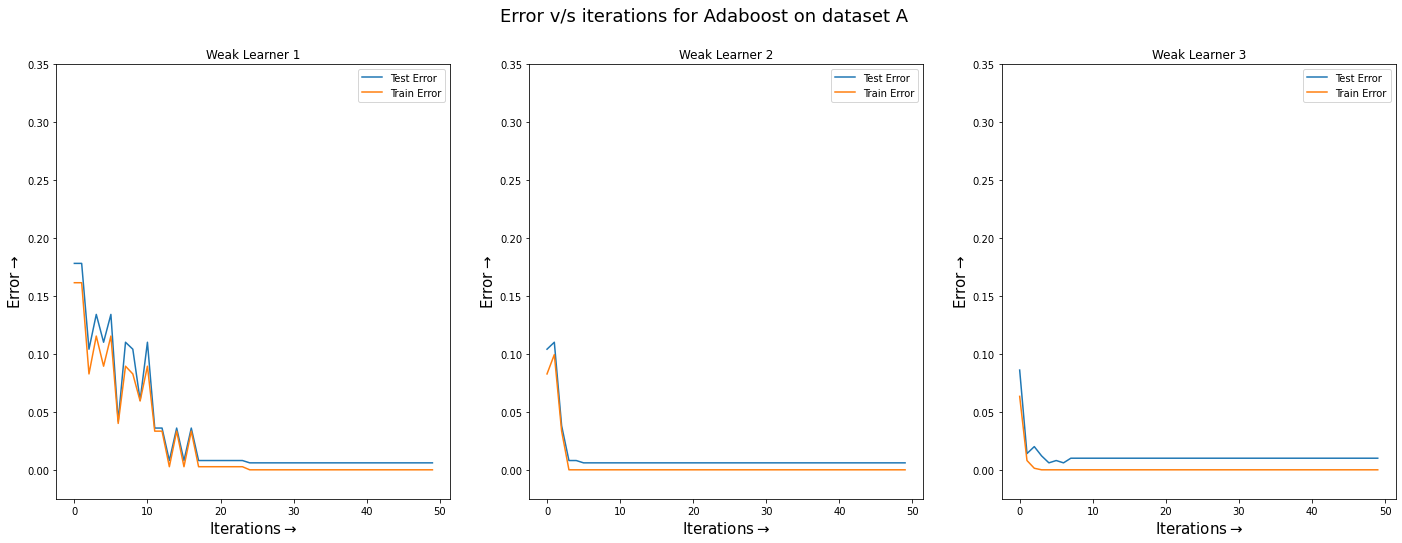

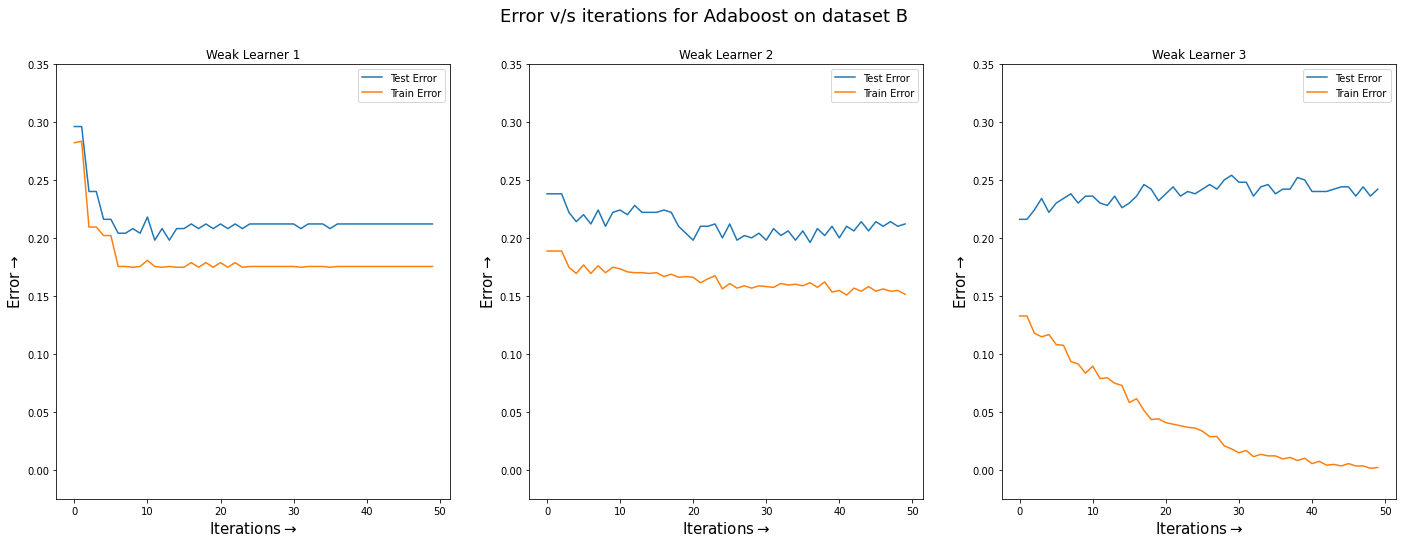

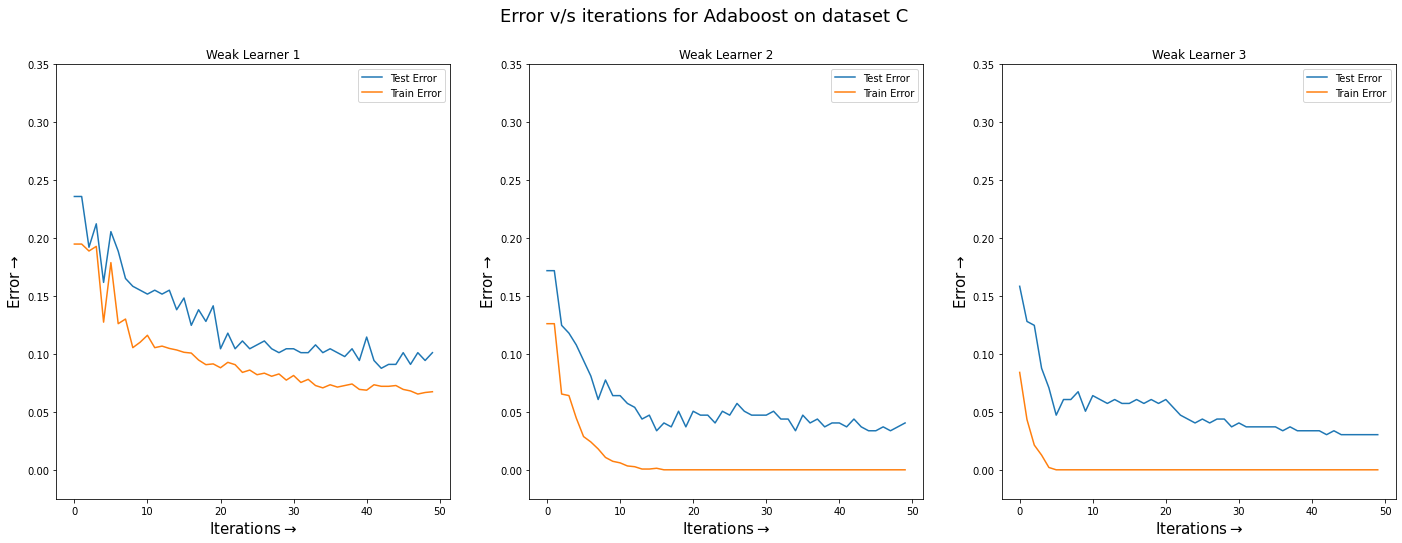

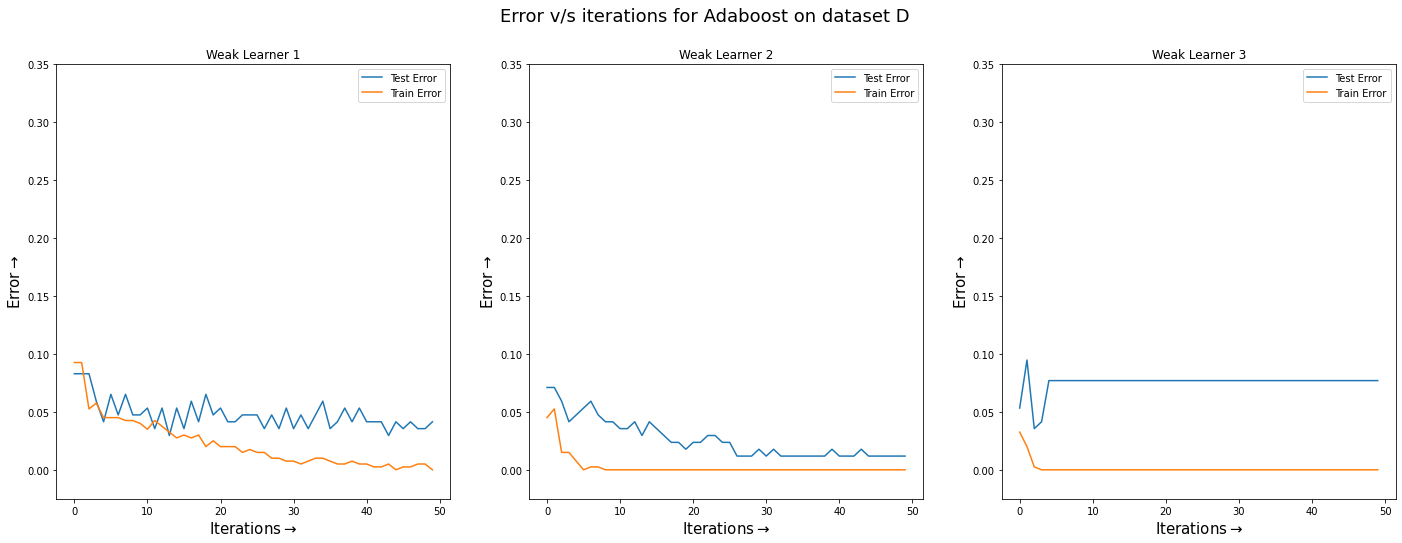

In [15]:
# Codewrite cell 
# Plots for iteration vs error here

####Uncomment the following lines in this block to get plots

file_path = '/content/Data/'
file_num = ['A','B','C','D']
num_learners = 3
X_train = {}
Y_train = {}
X_test = {}
Y_test = {}
train_error = np.zeros((len(file_num), num_learners))
test_error = np.zeros((len(file_num), num_learners))
train_errs = {}
test_errs = {}
betas = {}
learners = {}
for id in range(len(file_num)):
    X_tr, Y_tr, X_tst, Y_tst = preprocess(file_path + f"dataset_{file_num[id]}.npz")
    X_train[id], Y_train[id], X_test[id], Y_test[id] = X_tr, Y_tr, X_tst, Y_tst
    n = X_train[id].shape[0]
    plt.figure(figsize = (24,8))
    ttl = 'Error v/s iterations for Adaboost on dataset ' + file_num[id] 
    plt.suptitle(ttl, size = 18)
    for k, depth in enumerate([1,3,7]):
        plt.subplot(1,3,k+1)
        plt.gca().set_title(f"Weak Learner {k+1}")
        plt.gca().set_ylim([-0.025,0.3500])
        plt.gca().set_xlabel("Iterations" + r'$\rightarrow$', size = 15)
        plt.gca().set_ylabel("Error"+ r'$\rightarrow$', size = 15)
        samples = np.append(X_train[id], X_test[id], axis=0)
        betas[(id,k)], learners[(id,k)] = adaboost(X_train[id], Y_train[id], depth)
        Y_ret = run_ada_iter(betas[(id,k)],learners[(id,k)], samples)
        train_err_temp = []
        test_err_temp = []
        for Y_pred in Y_ret:
            Y_pred1 = Y_pred[:n]
            Y_pred2 = Y_pred[n:]
            err1 = np.sum(Y_pred1 != Y_train[id])/Y_train[id].shape[0]
            train_err_temp.append(err1)
            err2 = np.sum(Y_pred2 != Y_test[id])/Y_test[id].shape[0]
            test_err_temp.append(err2)
        x = [(i+1) for i in range(50)]
        plt.plot(np.array(test_err_temp), label = "Test Error")
        plt.plot(np.array(train_err_temp), label = "Train Error")
        train_errs[(id,k)] = train_err_temp
        test_errs[(id,k)] = test_err_temp
        plt.legend()
    plt.show()

<Figure size 432x288 with 0 Axes>

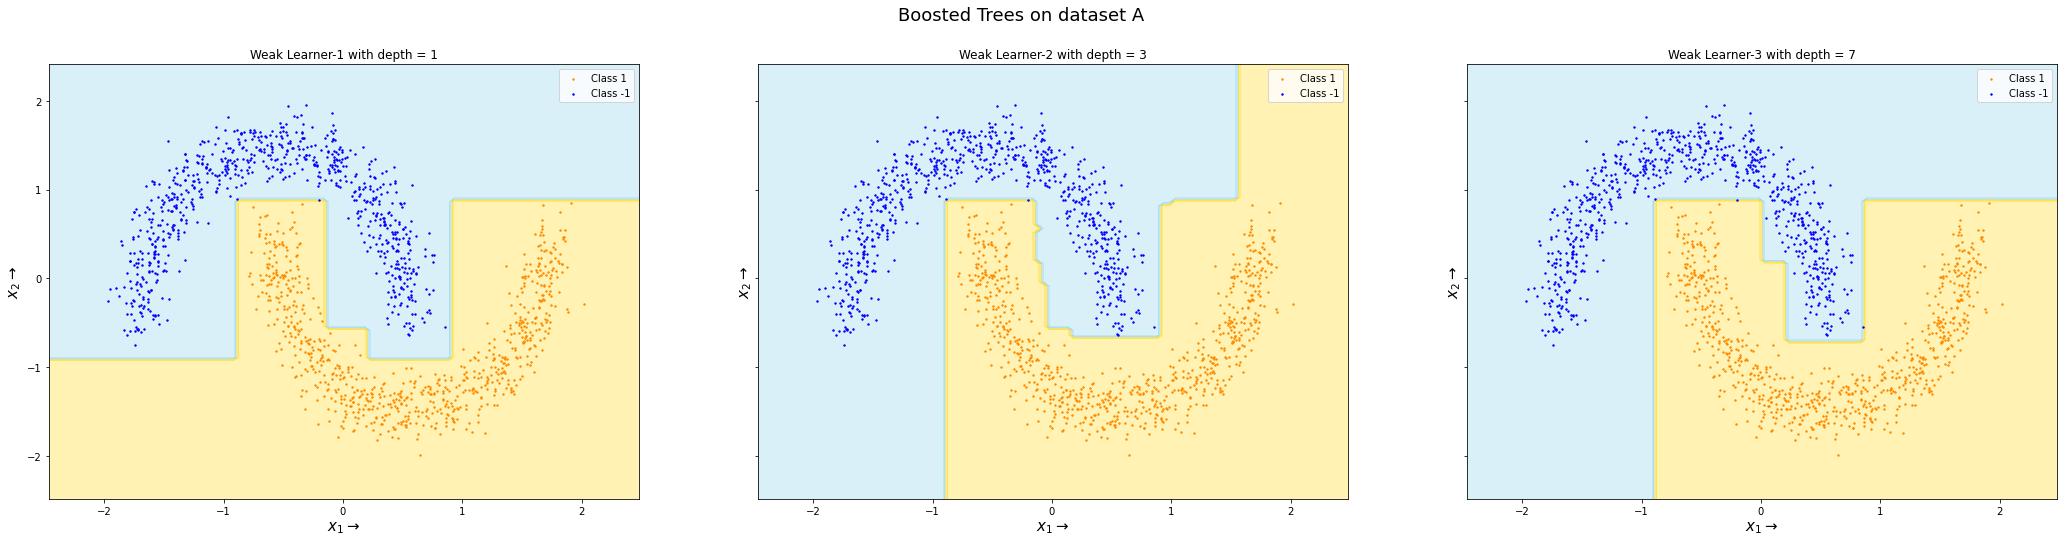

<Figure size 432x288 with 0 Axes>

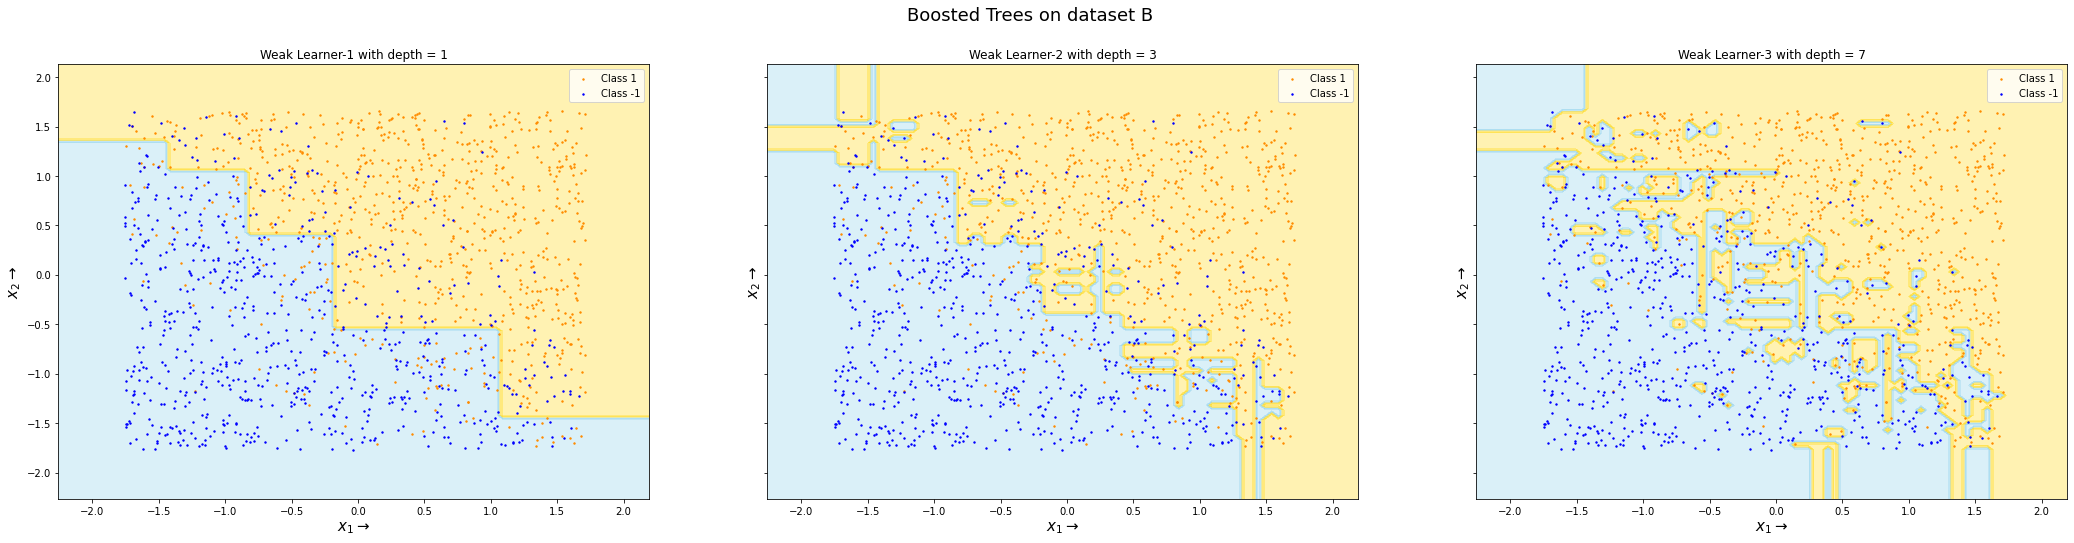

In [16]:
# Codewrite cell 
# Plots for illustrating the classifier here

####Uncomment the following lines in this block to get plots

X_train, Y_train, X_test, Y_test = preprocess('/content/Data/dataset_A.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
y_pred_1 = run_ada(betas[(0,0)],learners[(0,0)], testing_set)
y_pred_2 = run_ada(betas[(0,1)],learners[(0,1)], testing_set)
y_pred_3 = run_ada(betas[(0,2)],learners[(0,2)], testing_set)
plt.figure(0)
f, ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(36,8))
f.suptitle('Boosted Trees on dataset A', size = 18)
ax[0].contourf(X,Y,y_pred_1.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax[1].contourf(X,Y,y_pred_2.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax[2].contourf(X,Y,y_pred_3.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
learner_order = [1,2,3]
depths = [1,3,7]
for i, a in enumerate(ax):
    a.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='darkorange', label='Class 1')
    a.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='blue',label='Class -1')
    a.set_title(f'Weak Learner-{learner_order[i]} with depth = {depths[i]}')
    a.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    a.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    a.legend()
plt.show()


X_train, Y_train, X_test, Y_test = preprocess('/content/Data/dataset_B.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
y_pred_1 = run_ada(betas[(1,0)],learners[(1,0)], testing_set)
y_pred_2 = run_ada(betas[(1,1)],learners[(1,1)], testing_set)
y_pred_3 = run_ada(betas[(1,2)],learners[(1,2)], testing_set)
plt.figure(0)
f, ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(36,8))
f.suptitle('Boosted Trees on dataset B', size = 18)
ax[0].contourf(X,Y,y_pred_1.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax[1].contourf(X,Y,y_pred_2.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
ax[2].contourf(X,Y,y_pred_3.reshape(X.shape), cmap = mpl.colors.ListedColormap(('skyblue', 'gold')), alpha=0.3)
learner_order = [1,2,3]
depths = [1,3,7]
for i, a in enumerate(ax):
    a.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='darkorange', label='Class 1')
    a.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='blue',label='Class -1')
    a.set_title(f'Weak Learner-{learner_order[i]} with depth = {depths[i]}')
    a.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    a.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    a.legend()
plt.show()

Textwrite cell:
## Observations
- The Error v/s Iterations plot shows that after a few iterations, even a seemingly simple classifier like the one node decision tree can be boosted to perform similarly to random forests.
- The majority of weak learner and dataset combinations only require a few iterations before the errors converge to a constant value, indicating that boosting provides a rapid path to the best performance.
- Weak learner-3 only reduces the train error for dataset B; the test error remains high. Overfitting may be to blame, in which case a 1 node decision tree performs better on test data.
- Deeper trees converge faster while training
- Weak Learner-1, with a depth of 1, can provide relatively straightforward decision boundaries, whereas Weak Learner 3, with a depth of 7, can provide incredibly complex decision boundaries.